In [8]:
!pip install torch
!pip install torchvision
!pip install pillow==4.1.1

  Using cached https://files.pythonhosted.org/packages/36/e5/88b3d60924a3f8476fa74ec086f5fbaba56dd6cee0d82845f883b6b6dd18/Pillow-4.1.1-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: Pillow 5.1.0
    Uninstalling Pillow-5.1.0:
      Successfully uninstalled Pillow-5.1.0


Dataset from following [Git repo](https://github.com/garythung/trashnet).  
For Data Download:  [visit this drive link](https://drive.google.com/drive/folders/0B3P9oO5A3RvSUW9qTG11Ul83TEE) and download the file `dataset-resized.zip`

In [0]:
from __future__ import print_function, division

import torch
import os
from torchvision import transforms, datasets, models
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import time
from tqdm import tqdm, trange
import copy
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
model = torch.load('SmartBin-24e50-rs50.pth')
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

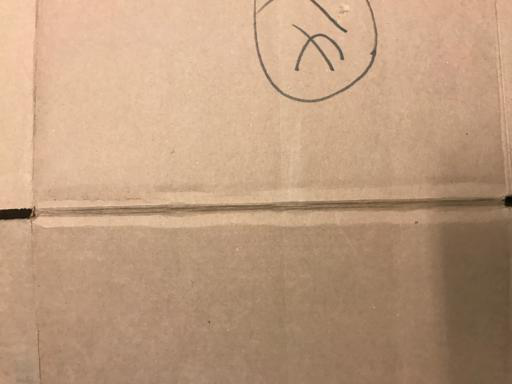

In [9]:
image_path= '/content/dataset-resized/cardboard/cardboard1.jpg'
image = Image.open(image_path)
image

In [10]:
from torch.autograd import Variable

imsize = 256
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])

trans = transforms.Compose([transforms.Resize(224),
                            transforms.CenterCrop(224),transforms.ToTensor(),normalize])

def image_loader(image_name):
    """load image, returns cuda tensor"""
    image = Image.open(image_name)
    image = trans(image).float()
    image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0)  
    return image.cuda()  #assumes that you're using GPU

image = image_loader(image_path)
print(image.shape)

torch.Size([1, 3, 224, 224])


In [0]:
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [13]:
outputs = model(image)
_, kpred = torch.topk(outputs.data, 1, dim=1)
prediction = class_names[kpred.item()]
prediction

'cardboard'